In [1]:
import numpy as np
import pandas as pd
import math
from matplotlib import pyplot as plt

plt.style.use("seaborn")
np.random.seed(0)

X_train_fpath = 'C:/Users/Terry/Machine_Learning-hw2/X_train'
Y_train_fpath = 'C:/Users/Terry/Machine_Learning-hw2/Y_train'
X_test_fpath = 'C:/Users/Terry/Machine_Learning-hw2/X_test'


# Parse csv files to numpy array
with open(X_train_fpath) as f:
    next(f)
    X_train = np.array([line.strip('\n').split(',')[1:] for line in f], dtype = np.float64)
with open(Y_train_fpath) as f:
    next(f)
    Y_train = np.array([line.strip('\n').split(',')[1:] for line in f], dtype = np.float64)
with open(X_test_fpath) as f:
    next(f)
    X_test = np.array([line.strip('\n').split(',')[1:] for line in f], dtype = np.float64)






In [2]:
#將training data再拆成training set,valid set

#feature scaling
column = np.arange(X_train.shape[1])   #510個變數
X_mean = np.mean(X_train[:, column] ,0).reshape(1, -1)
X_std  = np.std(X_train[:, column], 0).reshape(1, -1)
X_train[:,column] = (X_train[:, column] - X_mean) / (X_std + 1e-8)


X_train_set=X_train[:math.floor(0.85*np.shape(X_train)[0]),:]
Y_train=Y_train[:math.floor(0.85*np.shape(X_train)[0]),:]
X_valid_set=X_train[math.floor(0.85*np.shape(X_train)[0]):,:]
print(np.shape(Y_train))

(46117, 1)


In [3]:
#logistic function，z應為n*1之矩陣
#所有超過10^-8或1-10^-8之機率都會強制變成該數值
def logistic_function(z):
    for i in range(len(z)):
        z[i][0]=np.clip(1 / (1.0 + np.exp(-z[i][0])), 1e-8, 1 - (1e-8))
    return z

#共510個解釋變數加一個截距項
parameter=np.shape(X_train_set)[1]+1
# 儲存所有參數值的array，先全部設0
parameter_set=np.zeros([parameter,1])
X_set = np.concatenate((np.ones([np.shape(X_train_set)[0], 1]), X_train_set), axis=1).astype(np.float64)
loss_record=[]
adagrad=np.zeros([parameter,1],dtype=np.float64)

def implent_gradient_descent(Adagrad,parameter,Parameter_set,learning_rate,Lambda,x_set,y_set):
    regularization=np.zeros([parameter, 1],dtype = np.float64)
    for k in range(1,parameter):
        regularization[k][0]=2*Lambda*Parameter_set[k][0]
    Y_predict=np.round(logistic_function(np.dot(x_set, Parameter_set)))
    gradient =-1*np.dot(x_set.transpose(),y_set-Y_predict)+regularization
    Adagrad += gradient ** 2
    Parameter_set = Parameter_set - learning_rate * gradient / np.sqrt(Adagrad + 1e-8)
    return Adagrad,Parameter_set


In [4]:
eporch=8
batch_size=16

for i in range(eporch):
    for j in range(int(np.floor(np.shape(X_train_set)[0] / batch_size))):
        X = X_set[j*batch_size:(j+1)*batch_size]
        Y = Y_train[j*batch_size:(j+1)*batch_size]
        adagrad,parameter_set=implent_gradient_descent(adagrad,parameter,parameter_set,0.055,1,X,Y)
        
    
    Y_predict=np.round(logistic_function(np.dot(X_set, parameter_set)))
    cross_entropy = -1*(np.dot(Y_train.transpose(), np.log(Y_predict+1e-8)) + np.dot((1 - Y_train).transpose(), np.log(1 - Y_predict+1e-8)))
    
    acc = 1 - np.mean(np.abs(Y_predict - Y_train))
    loss_record.append([cross_entropy,acc])
    randomize = np.arange(np.shape(X_train_set)[0])
    np.random.shuffle(randomize)
    X_set=X_set[randomize]
    Y_train= Y_train[randomize]

    
np.save('weight.npy', parameter_set)



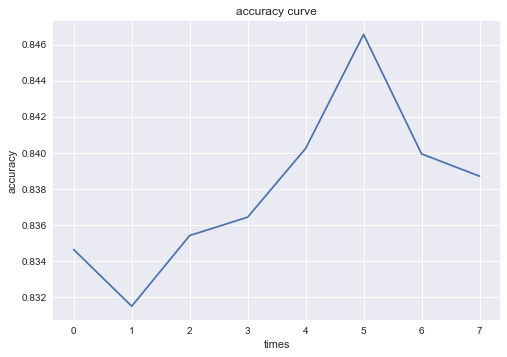

            cross entropy  accuracy
0  [[140494.53164922557]]  0.834616
1  [[143165.53035854868]]  0.831472
2  [[139831.38714208273]]  0.835397
3   [[138965.6151466472]]  0.836416
4  [[135723.57533395145]]  0.840232
5  [[130344.73655379751]]  0.846564
6   [[135981.4648645068]]  0.839929
7  [[137031.44366748194]]  0.838693


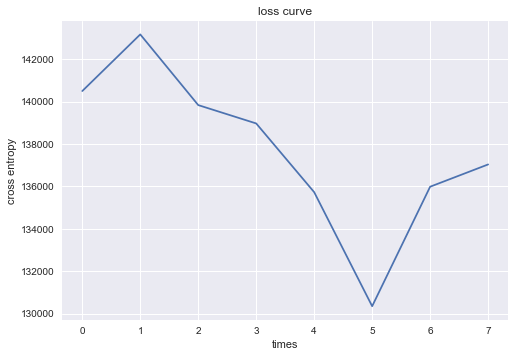

In [5]:
df=pd.DataFrame(loss_record,columns=['cross entropy','accuracy'])
df=df.iloc[:,:]
plt.plot(df.index,df.accuracy, '-', label='Logistic Model')
plt.title("accuracy curve")
plt.ylabel("accuracy") # y label
plt.xlabel("times") # x label
plt.show()    
print(df)
plt.plot(df.index,df['cross entropy'], '-', label='Logistic Model')
plt.title("loss curve")
plt.ylabel("cross entropy") # y label
plt.xlabel("times") # x label
plt.show()  

